# Lending Club Case Study - Exploratory Data Analysis

##   Student: Karthik Jayaraman

### Case Study Objective

#### 1. Understand how consumer attributes and loan attributes influence the tendency of loan payment default.

#### 2. Identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan or lending (to risky applicants) at a higher interest rate. Customers labelled as 'charged-off' are the 'defaulters'

## Import essential libraries

In [344]:
# All imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Import Loan CSV dataset

### Import Error shown for Dates. Use proper date format by examining the raw CSV.

In [345]:
pd.set_option("display.max_columns", None)

dateparse = lambda x: pd.to_datetime(x, errors='coerce', format='%b-%y')
loan = pd.read_csv('loan.csv', parse_dates=['issue_d','earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d'], date_parser=dateparse)


### Correct the outlier date values 

In [346]:
#Year below 1969 is treated as 2000+ based on datetime library
loan[loan['earliest_cr_line'].dt.year > 2024]['earliest_cr_line'].value_counts()

2062-09-01    4
2067-04-01    4
2064-09-01    4
2068-08-01    4
2068-09-01    4
2066-11-01    4
2067-09-01    3
2066-03-01    3
2064-04-01    3
2067-11-01    3
2068-02-01    3
2063-05-01    3
2068-01-01    2
2068-12-01    2
2067-07-01    2
2063-10-01    2
2063-01-01    2
2065-02-01    2
2065-10-01    2
2067-10-01    2
2065-05-01    2
2068-03-01    2
2050-12-01    1
2068-11-01    1
2066-12-01    1
2066-02-01    1
2061-12-01    1
2067-05-01    1
2067-02-01    1
2061-11-01    1
2062-11-01    1
2054-11-01    1
2063-09-01    1
2065-12-01    1
2064-07-01    1
2046-01-01    1
2066-06-01    1
2056-09-01    1
2059-06-01    1
2064-10-01    1
2065-09-01    1
2066-04-01    1
2068-06-01    1
2054-10-01    1
2065-11-01    1
2063-03-01    1
2063-12-01    1
2067-08-01    1
2067-06-01    1
2068-10-01    1
Name: earliest_cr_line, dtype: int64

In [347]:
# Replace with correct Year value for odd values
loan['earliest_cr_line'] = loan['earliest_cr_line'].apply(lambda x: x if (x.year < 2024) else x - pd.DateOffset(years=100))

# Cleaning & Fixing Dataset

### Drop columns where all values zero or null

In [348]:
loan.dropna(axis=1, how='all', inplace=True)

In [349]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          39717 non-null  int64         
 1   member_id                   39717 non-null  int64         
 2   loan_amnt                   39717 non-null  int64         
 3   funded_amnt                 39717 non-null  int64         
 4   funded_amnt_inv             39717 non-null  float64       
 5   term                        39717 non-null  object        
 6   int_rate                    39717 non-null  object        
 7   installment                 39717 non-null  float64       
 8   grade                       39717 non-null  object        
 9   sub_grade                   39717 non-null  object        
 10  emp_title                   37258 non-null  object        
 11  emp_length                  38642 non-null  object    

In [350]:
display(loan.head(3))


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,1985-01-01,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,2015-01-01,171.62,NaT,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,1999-04-01,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,2013-04-01,119.66,NaT,2013-09-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,2001-11-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,2014-06-01,649.91,NaT,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


### Drop columns where number of rows > 50% is null

In [351]:
print(round(100*(loan.isnull().sum()/len(loan.index)),2))

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [352]:
loan.drop(columns = loan.columns[round(100*(loan.isnull().sum()/len(loan.index)),2) > 50], inplace=True)

### Drop the columns where all values are same as its not useful for correlation analysis

In [353]:
# Drop the columns where all values are same as its not useful for correlation analysis
loan.drop(columns=loan.columns[loan.nunique() <= 1], inplace=True)

### Drop the columns which may not contribute to decision of loan status

In [354]:
### Drop the columns which may not contribute to the decision of loan status
irrelevant_columns = ['emp_title','url','desc','title','zip_code','delinq_2yrs','revol_bal',
                      'out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
                      'total_rec_late_fee','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','recoveries']

loan.drop(columns=irrelevant_columns, inplace=True)


In [355]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    39717 non-null  int64         
 1   member_id             39717 non-null  int64         
 2   loan_amnt             39717 non-null  int64         
 3   funded_amnt           39717 non-null  int64         
 4   funded_amnt_inv       39717 non-null  float64       
 5   term                  39717 non-null  object        
 6   int_rate              39717 non-null  object        
 7   installment           39717 non-null  float64       
 8   grade                 39717 non-null  object        
 9   sub_grade             39717 non-null  object        
 10  emp_length            38642 non-null  object        
 11  home_ownership        39717 non-null  object        
 12  annual_inc            39717 non-null  float64       
 13  verification_sta

# Exploring columns & correcting for analysis

### Column 'id'

In [356]:
#verify Column id : A unique LC assigned ID for the loan listing.
print("Column id is unique?", loan['id'].is_unique)
print("Column id has null?", loan['id'].isnull().values.any())

Column id is unique? True
Column id has null? False


### Column 'member_id'

In [357]:
#verify Column member_id: A unique LC assigned Id for the borrower member.
print("Column member_id is unique?", loan['member_id'].is_unique)
print("Column member_id has null?", loan['member_id'].isnull().values.any())

Column member_id is unique? True
Column member_id has null? False


### Column 'term': 
The number of payments on the loan. Values are in months and can be either 36 or 60

In [358]:
#term: The number of payments on the loan. Values are in months and can be either 36 or 60.
# Value Counts
print (loan["term"].value_counts())

 36 months    29096
 60 months    10621
Name: term, dtype: int64


In [359]:
# Remove 'months' string from column 'term'
loan["term"] = loan["term"].str.replace("months", '')
loan["term"] = loan["term"].str.strip()

In [360]:
loan["term"].value_counts()

36    29096
60    10621
Name: term, dtype: int64

In [361]:
# Convert column 'term' Dtype from object to int64
loan["term"] = pd.to_numeric(loan["term"])
print(loan["term"].dtypes)

int64


### Column 'int_rate': 
Interest Rate on the loan

In [362]:
#int_rate: Interest Rate on the loan
# Value Counts
print (loan["int_rate"].value_counts())

10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: int_rate, Length: 371, dtype: int64


In [363]:
# Remove '%' string from column 'int_rate'
loan["int_rate"] = loan["int_rate"].str.replace("%", '')
loan["int_rate"] = loan["int_rate"].str.strip()
loan["int_rate"].value_counts()

10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
18.36      1
16.96      1
16.15      1
16.01      1
17.44      1
Name: int_rate, Length: 371, dtype: int64

In [364]:
loan["int_rate"] = pd.to_numeric(loan["int_rate"])
print(loan["int_rate"].dtypes)

float64


### Column 'grade': 
LC assigned loan grade

In [365]:
print (loan["grade"].value_counts()) 

B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64


### Column 'sub_grade': 
LC assigned loan sub_grade

In [366]:
print (loan["sub_grade"].value_counts()) 

B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: sub_grade, dtype: int64


### Column 'emp_length'
Employment length in years. 
Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

In [367]:
loan["emp_length"].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [368]:
# Remove 'year(s)' string from column 'emp_length' and replace '<1' & '10+' with numeric 
loan["emp_length"] = loan["emp_length"].str.replace("< 1 year", '0')
loan["emp_length"] = loan["emp_length"].str.replace("years", '')
loan["emp_length"] = loan["emp_length"].str.replace("year", '')
loan["emp_length"] = loan["emp_length"].str.replace("<", '')
loan["emp_length"] = loan["emp_length"].str.replace("+", '', regex=False)
loan["emp_length"] = loan["emp_length"].str.strip()
loan["emp_length"].value_counts()

10    8879
0     4583
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64

In [369]:
#Convert column 'emp_length' to int64 DType
loan["emp_length"] = pd.to_numeric(loan["emp_length"])
print(loan["emp_length"].dtypes)

float64


### Column 'home_ownership'
The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER 

In [370]:
loan["home_ownership"].value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

### Column 'annual_inc'
The self-reported annual income provided by the borrower during registration.

In [371]:
loan["annual_inc"].value_counts()

60000.0    1505
50000.0    1057
40000.0     876
45000.0     830
30000.0     825
           ... 
56820.0       1
45314.0       1
53913.0       1
62880.0       1
27376.0       1
Name: annual_inc, Length: 5318, dtype: int64

### Column 'verification_status'
Indicates if income was verified by LC, not verified, or if the income source was verified

In [372]:
loan["verification_status"].value_counts()

Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64

### Column 'loan_status'
Current status of the loan

In [373]:
loan["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

#### Remove rows where the loan status ('Current') is not decisive

In [374]:
loan = loan[loan['loan_status'] != 'Current']

In [375]:
loan["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

### Column 'purpose'
A category provided by the borrower for the loan request. 

In [376]:
loan["purpose"].value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

### Column 'addr_state'
The state provided by the borrower in the loan application

In [377]:
loan["addr_state"].value_counts()

CA    6949
NY    3698
FL    2781
TX    2659
NJ    1790
IL    1478
PA    1468
VA    1369
GA    1359
MA    1297
OH    1178
MD    1023
AZ     849
WA     818
CO     766
NC     750
CT     726
MI     704
MO     670
MN     605
NV     479
SC     459
WI     440
AL     435
OR     435
LA     427
KY     311
OK     287
KS     255
UT     252
AR     235
DC     211
RI     194
NM     183
WV     172
NH     166
HI     166
DE     113
MT      83
WY      80
AK      78
SD      62
VT      53
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

### Column 'dti'
A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, 
excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [378]:
print(loan["dti"].value_counts())
print("\n")
print(loan["dti"].dtypes)

0.00     178
12.00     46
18.00     45
19.20     39
13.20     39
        ... 
28.95      1
25.85      1
25.77      1
27.20      1
25.43      1
Name: dti, Length: 2853, dtype: int64


float64


### Column 'earliest_cr_line'
The month the borrower's earliest reported credit line was opened

In [379]:
print(loan["earliest_cr_line"].value_counts())

1999-10-01    360
1998-11-01    357
2000-10-01    341
1998-12-01    340
1997-12-01    318
             ... 
1965-11-01      1
1973-02-01      1
2008-10-01      1
1961-12-01      1
1974-10-01      1
Name: earliest_cr_line, Length: 524, dtype: int64


In [380]:
# Extract earliest_cr_line year & month for furthe analysis
loan['earliest_cr_line_year'] = loan['earliest_cr_line'].dt.year.astype(str) 
loan['earliest_cr_line_month'] = loan['earliest_cr_line'].dt.strftime('%b')

### Column 'inq_last_6mths'
The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

In [381]:
print(loan["inq_last_6mths"].value_counts())

0    18709
1    10660
2     5654
3     2983
4      316
5      144
6       63
7       34
8       14
Name: inq_last_6mths, dtype: int64


 ### Column 'open_acc'
The number of open credit lines in the borrower's credit file.

In [382]:
print(loan["open_acc"].value_counts())

7     3909
6     3846
8     3814
9     3607
5     3111
10    3097
11    2666
4     2300
12    2198
13    1855
3     1470
14    1427
15    1146
16     908
17     716
2      596
18     516
19     384
20     281
21     235
22     137
23      93
24      75
25      53
26      34
28      24
27      22
30      15
29      13
31       7
34       5
35       4
32       3
33       3
36       2
39       1
38       1
44       1
41       1
42       1
Name: open_acc, dtype: int64


### Column 'revol_util'
Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [383]:
print(loan["revol_util"].value_counts())
print("\n")
print(loan["revol_util"].dtypes)

0%        954
0.20%      62
63%        62
40.70%     57
31.20%     57
         ... 
77.63%      1
25.74%      1
0.83%       1
47.36%      1
7.28%       1
Name: revol_util, Length: 1088, dtype: int64


object


In [384]:
# Remove '%' string from column 'revol_util'
loan["revol_util"] = loan["revol_util"].str.replace("%", '')
loan["revol_util"] = loan["revol_util"].str.strip()
loan["revol_util"].value_counts()


0        954
0.20      62
63        62
40.70     57
31.20     57
        ... 
77.63      1
25.74      1
0.83       1
47.36      1
7.28       1
Name: revol_util, Length: 1088, dtype: int64

In [385]:
loan["revol_util"] = pd.to_numeric(loan["revol_util"])
print(loan["revol_util"].dtypes)

float64


### Column 'pub_rec_bankruptcies'
Number of public record bankruptcies

In [386]:
print(loan["pub_rec_bankruptcies"].value_counts())

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64


### Column 'pub_rec'
Number of derogatory public records

In [387]:
print(loan["pub_rec"].value_counts())

0    36507
1     2013
2       48
3        7
4        2
Name: pub_rec, dtype: int64


### Column 'total_acc'
The total number of credit lines currently in the borrower's credit file

In [388]:
print(loan["total_acc"].value_counts())

16    1424
15    1418
17    1411
14    1403
20    1390
      ... 
74       1
77       1
78       1
87       1
90       1
Name: total_acc, Length: 82, dtype: int64


### Column 'issue_d'
The month which the loan was funded

In [389]:
# Extract issue year & month for furthe analysis
loan['issue_d_year'] = loan['issue_d'].dt.year.astype(str) 
loan['issue_d_month'] = loan['issue_d'].dt.strftime('%b')

In [390]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,earliest_cr_line_year,earliest_cr_line_month,issue_d_year,issue_d_month
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,1985-01-01,1,3,0,83.7,9,0.0,1985,Jan,2011,Dec
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,0.0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,1999-04-01,5,3,0,9.4,4,0.0,1999,Apr,2011,Dec
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,2001-11-01,2,2,0,98.5,10,0.0,2001,Nov,2011,Dec
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,1996-02-01,1,10,0,21.0,37,0.0,1996,Feb,2011,Dec
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,3.0,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,2004-11-01,3,9,0,28.3,12,0.0,2004,Nov,2011,Dec


# Data Analysis
##  Understand the driving factors behind loan default (Charged Off)

### Types of Variables

Based on EDA knowledge the types of variables are

a. Categorical

    - Ordered (eg: month, age, salary band, ...)
    
    - UnOrdered (eg: Location, Color,..)
    
b. Numeric/Quantitative

In [391]:
categorical_ordered = ['term','grade','sub_grade','emp_length','home_ownership','verification_status',
                       'issue_d','loan_status','earliest_cr_line']

In [392]:
categorical_unordered = ['purpose','addr_state']

In [393]:
numeric_quantitative = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment',
                        'annual_inc','dti','inq_last_6mths','open_acc','pub_rec',
                       'revol_util','total_acc','pub_rec_bankruptcies']

### Univariate Analysis on Quantitative Variables 

### Outlier detection & removal

In [394]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      38577 non-null  int64         
 1   member_id               38577 non-null  int64         
 2   loan_amnt               38577 non-null  int64         
 3   funded_amnt             38577 non-null  int64         
 4   funded_amnt_inv         38577 non-null  float64       
 5   term                    38577 non-null  int64         
 6   int_rate                38577 non-null  float64       
 7   installment             38577 non-null  float64       
 8   grade                   38577 non-null  object        
 9   sub_grade               38577 non-null  object        
 10  emp_length              37544 non-null  float64       
 11  home_ownership          38577 non-null  object        
 12  annual_inc              38577 non-null  float6

### Helper functions to Remove outliers in a specific dataframe column using IQR method

In [395]:
# Function to remove lower threshold values & return new dataframe
def remove_lower_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    #Inter Quartile Range
    IQR = Q3 - Q1
    return df[~((df[columns] < (Q1 - 1.5 * IQR))).any(axis=1)]

# Function to remove lower threshold values & return new dataframe
def remove_upper_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    #Inter Quartile Range
    IQR = Q3 - Q1
    return df[~((df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
    

In [396]:

# Function to draw grid of box plots
def plot_boxplots_grid(df, columns):
    len_cols = len(columns)

    fig, axes = plt.subplots(3, 5, figsize=(18, 12), sharey=False, squeeze=False)

    for i, col in enumerate(columns):
        r = i // 5
        c = i % 5
        sns.boxplot(ax=axes[r][c], x=col, data=df)
        axes[r][c].set_title(col)
        
    plt.tight_layout()


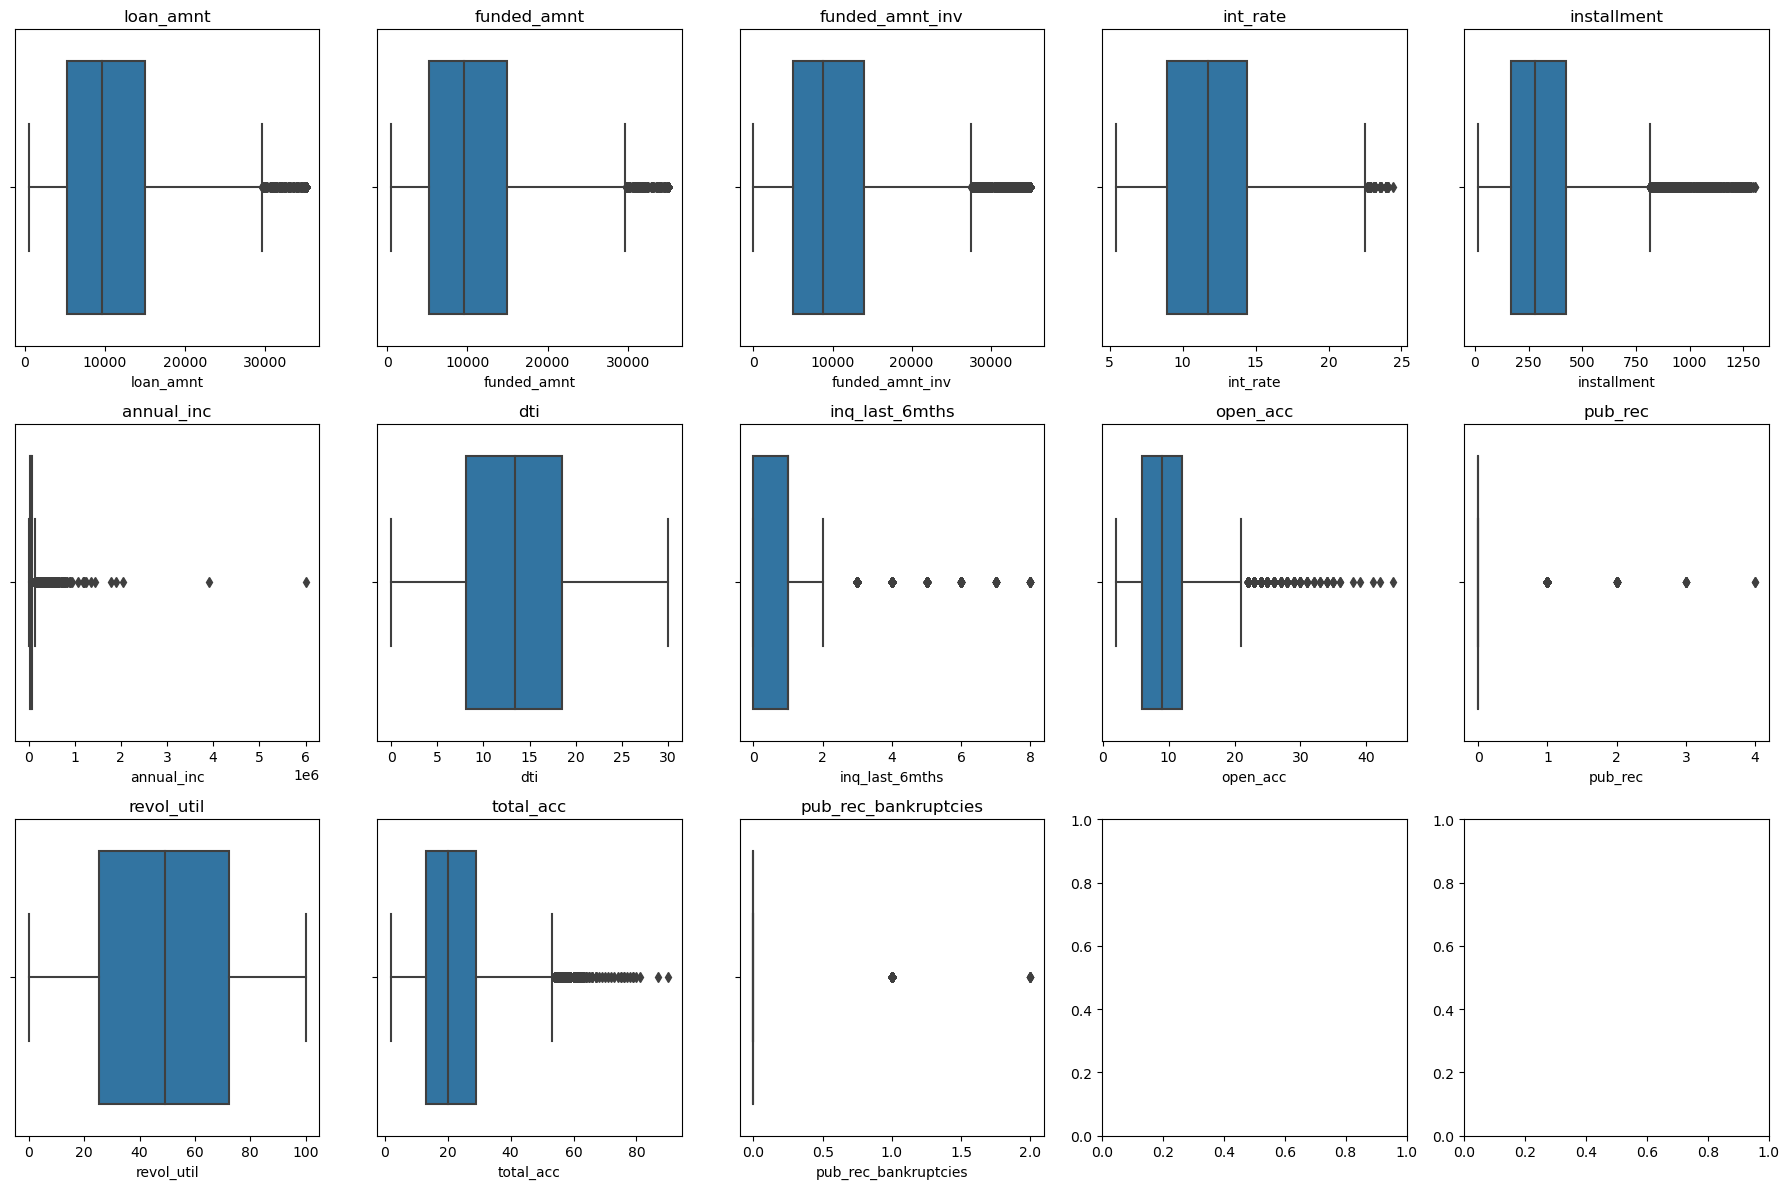

In [397]:
plot_boxplots_grid(loan, numeric_quantitative)

### Analyzing & removing outliers in 'annual_inc' column

In [398]:
loan['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

<Axes: xlabel='annual_inc'>

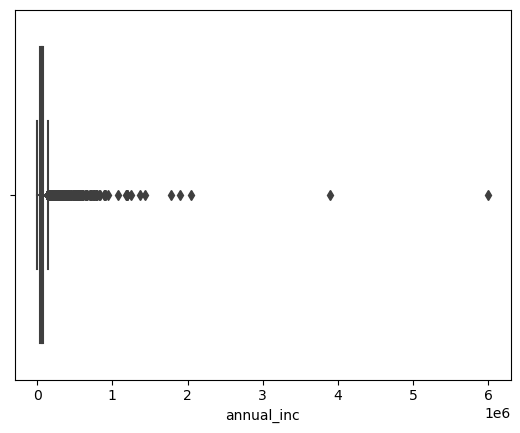

In [399]:
#Before removing 'annual_inc' outliers which could skew analysis
sns.boxplot(x='annual_inc', data=loan)

In [400]:
loan = remove_upper_outliers(loan, ['annual_inc'])

In [401]:
loan['annual_inc'].describe()

count     36815.000000
mean      61218.193490
std       28224.583784
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       78000.000000
max      145000.000000
Name: annual_inc, dtype: float64

<Axes: xlabel='annual_inc'>

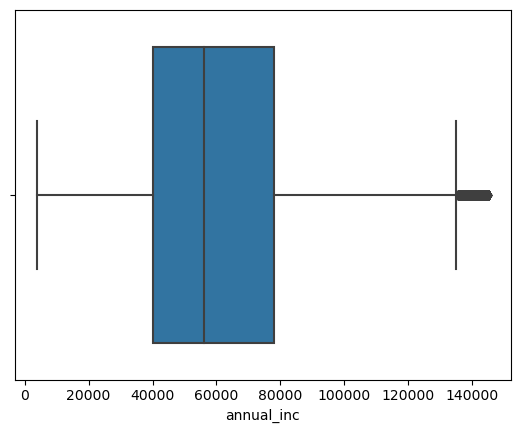

In [402]:
#After removing 'annual_inc' outliers
sns.boxplot(x='annual_inc', data=loan)

### Categorizing Numeric columns

In [403]:
loan['int_rate_grp'] = pd.cut(loan['int_rate'], bins=6,precision=0,labels=['5%-8%','8%-11%','11%-14%','14%-18%','18%-21%','21%-24%'])

In [404]:
loan['annual_inc_grp'] = pd.cut(loan['annual_inc'], bins=6, precision=0, labels=['3.8k-27.5k','27.5k-51k','51k-74.5k','74.5k-98k','98k-121.5k','121.5k-145k'])

In [405]:
loan['installment_grp'] = pd.cut(loan['installment'], bins=6,precision=0,labels=['14-231','231-446','446-660','660-875','875-1090','1090-1305'])


In [406]:
loan['loan_amnt_grp'] = pd.cut(loan['loan_amnt'], bins=6,precision=0,labels=['466-6.25k','6.25k-12k','12k-17.75k','17.75k-23.5k','23.5k-29.25k','29.25k-35k'])


# Univariate analysis

In [407]:
# Function to draw grid of histogram plots for Numerical variables
def plot_histplots_grid(df, columns):
    len_cols = len(columns)

    fig, axes = plt.subplots(4, 4, figsize=(18,16), sharey=False, squeeze=False)

    for i, col in enumerate(columns):
        r = i // 4
        c = i % 4
        #bins = np.histogram_bin_edges(df[col], bins='auto')
        sns.histplot(data=df, x=col, hue='loan_status', multiple='stack', ax=axes[r, c], bins=35)
        axes[r][c].set_title(col)
        axes[r][c].tick_params(axis='x', labelrotation=90)
                
    plt.tight_layout()

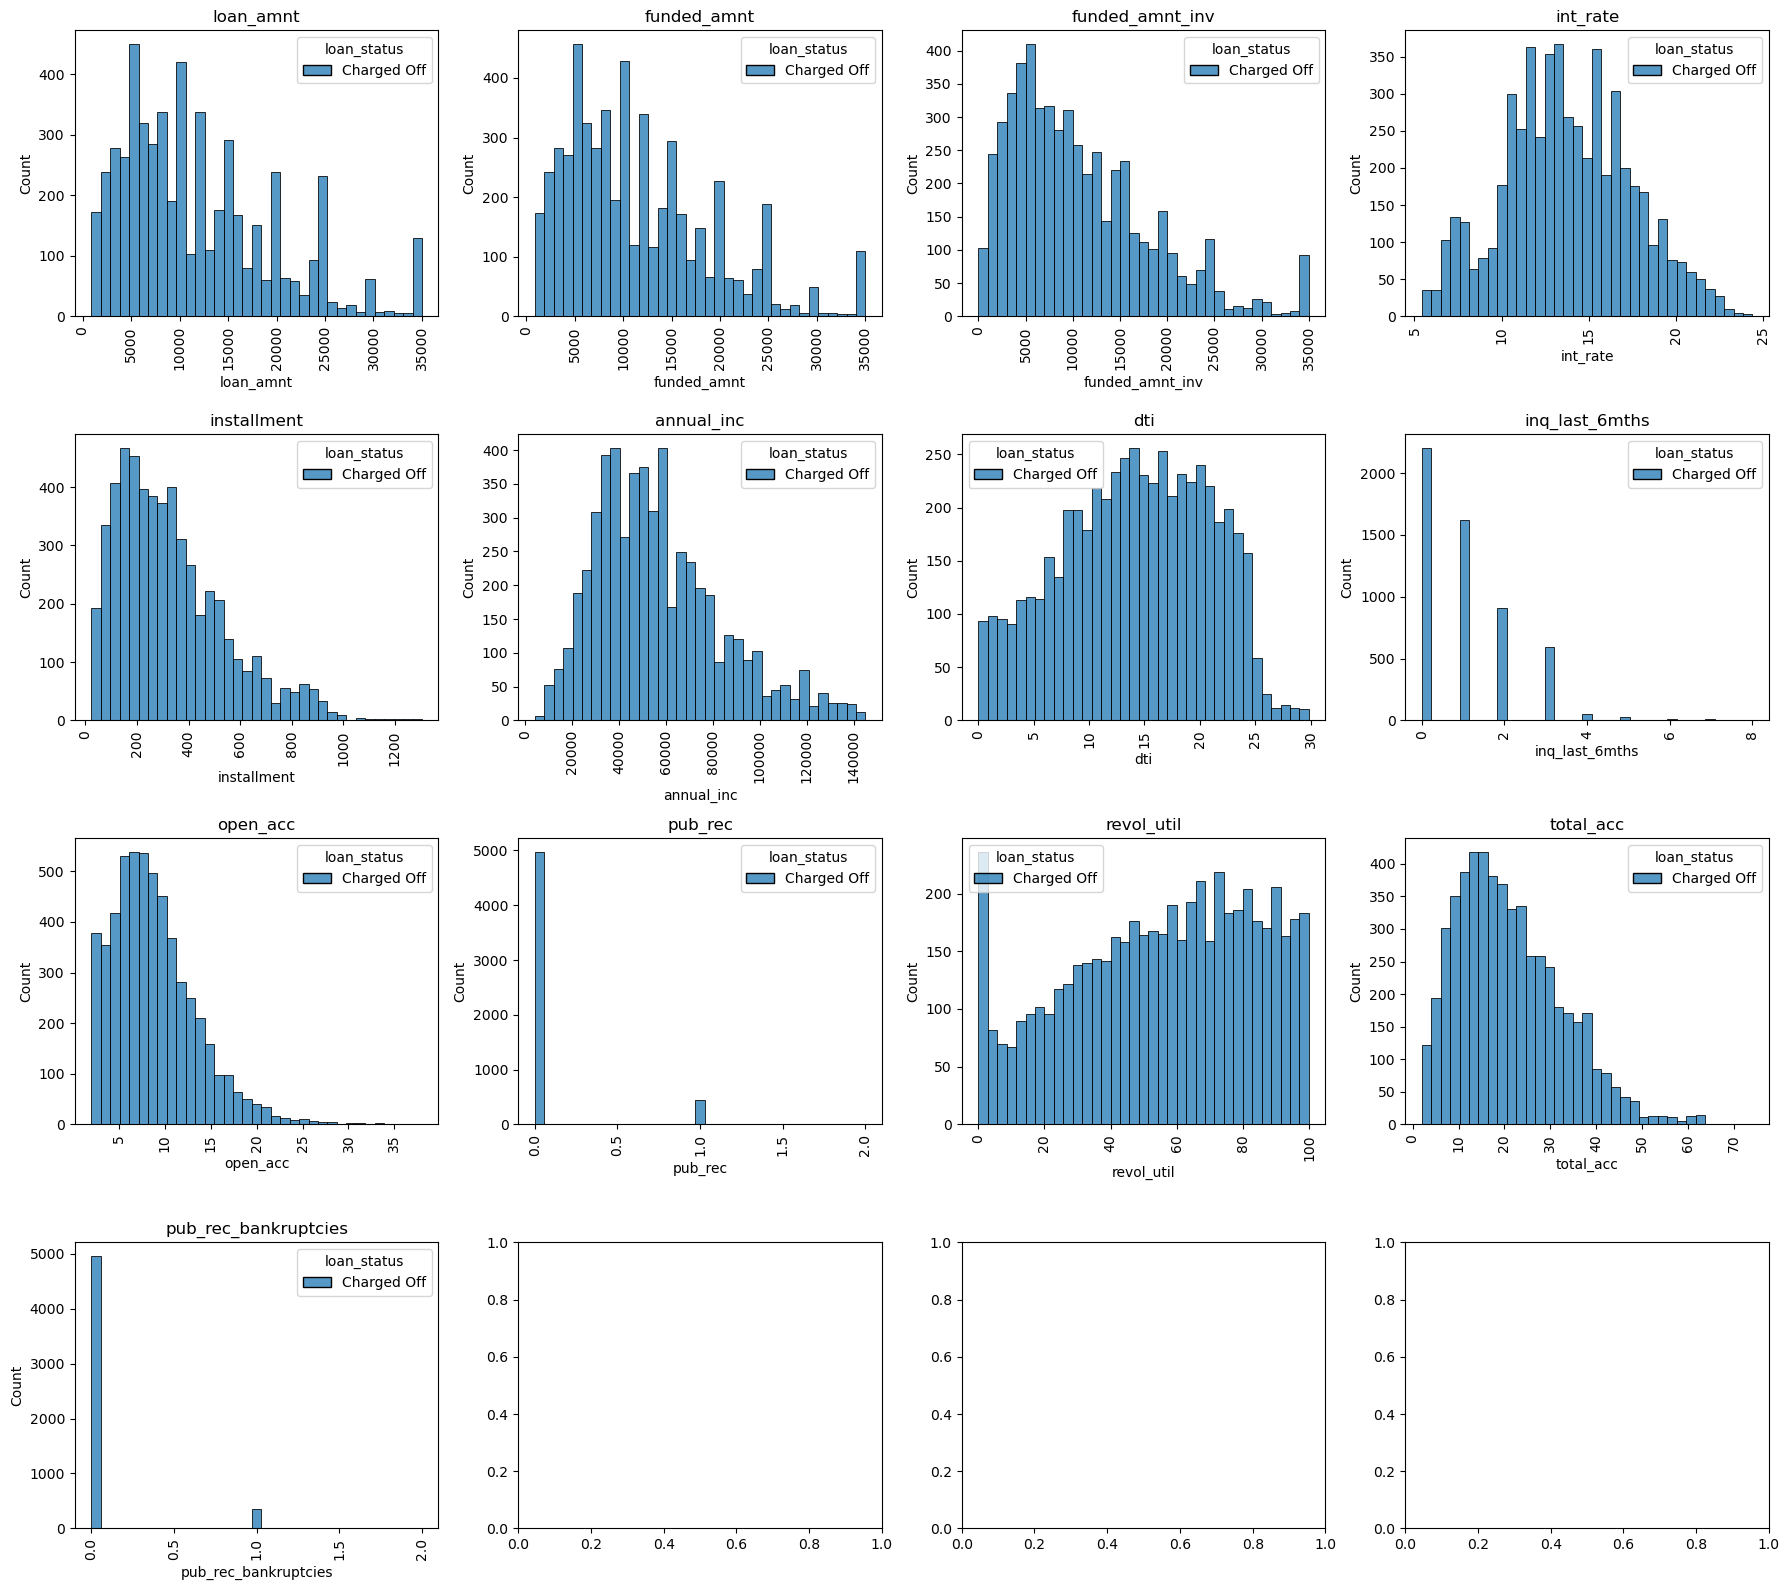

In [408]:
plot_histplots_grid(loan[loan.loan_status == 'Charged Off'], numeric_quantitative)

## Observation 1.
### Histogram Univariate Numerical Analysis on Defaulters ('Charged off' Loan status)

The Number of Loan defaulters are higher in following cases:

a. The Funded amount is in range 5000 to 12000

b. The Funded amount by investor is in range 3000 to 13000

c. The Interest Rate on the loan is between 10% to 16%

d. The Monthly installment is between 100 & 400

e. The Annual income is between 30000 & 60000

f. The DTI (Debt-to-Income) ratio is between 0 & 25

&emsp; &emsp; *DTI is a ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income*

In [409]:
# Function to draw grid of histogram plots for Categorical variables
def plot_countplots_grid(df, columns, numrows):
    len_cols = len(columns)

    fig, axes = plt.subplots(numrows, 2, figsize=(18,16), sharey=False, squeeze=False)

    for i, col in enumerate(columns):
        r = i // 2
        c = i % 2
        sns.countplot(data=df, x=col, hue='loan_status', ax=axes[r, c])
        axes[r][c].set_title(col)
        axes[r][c].tick_params(axis='x', labelrotation=90)
                
    plt.tight_layout()

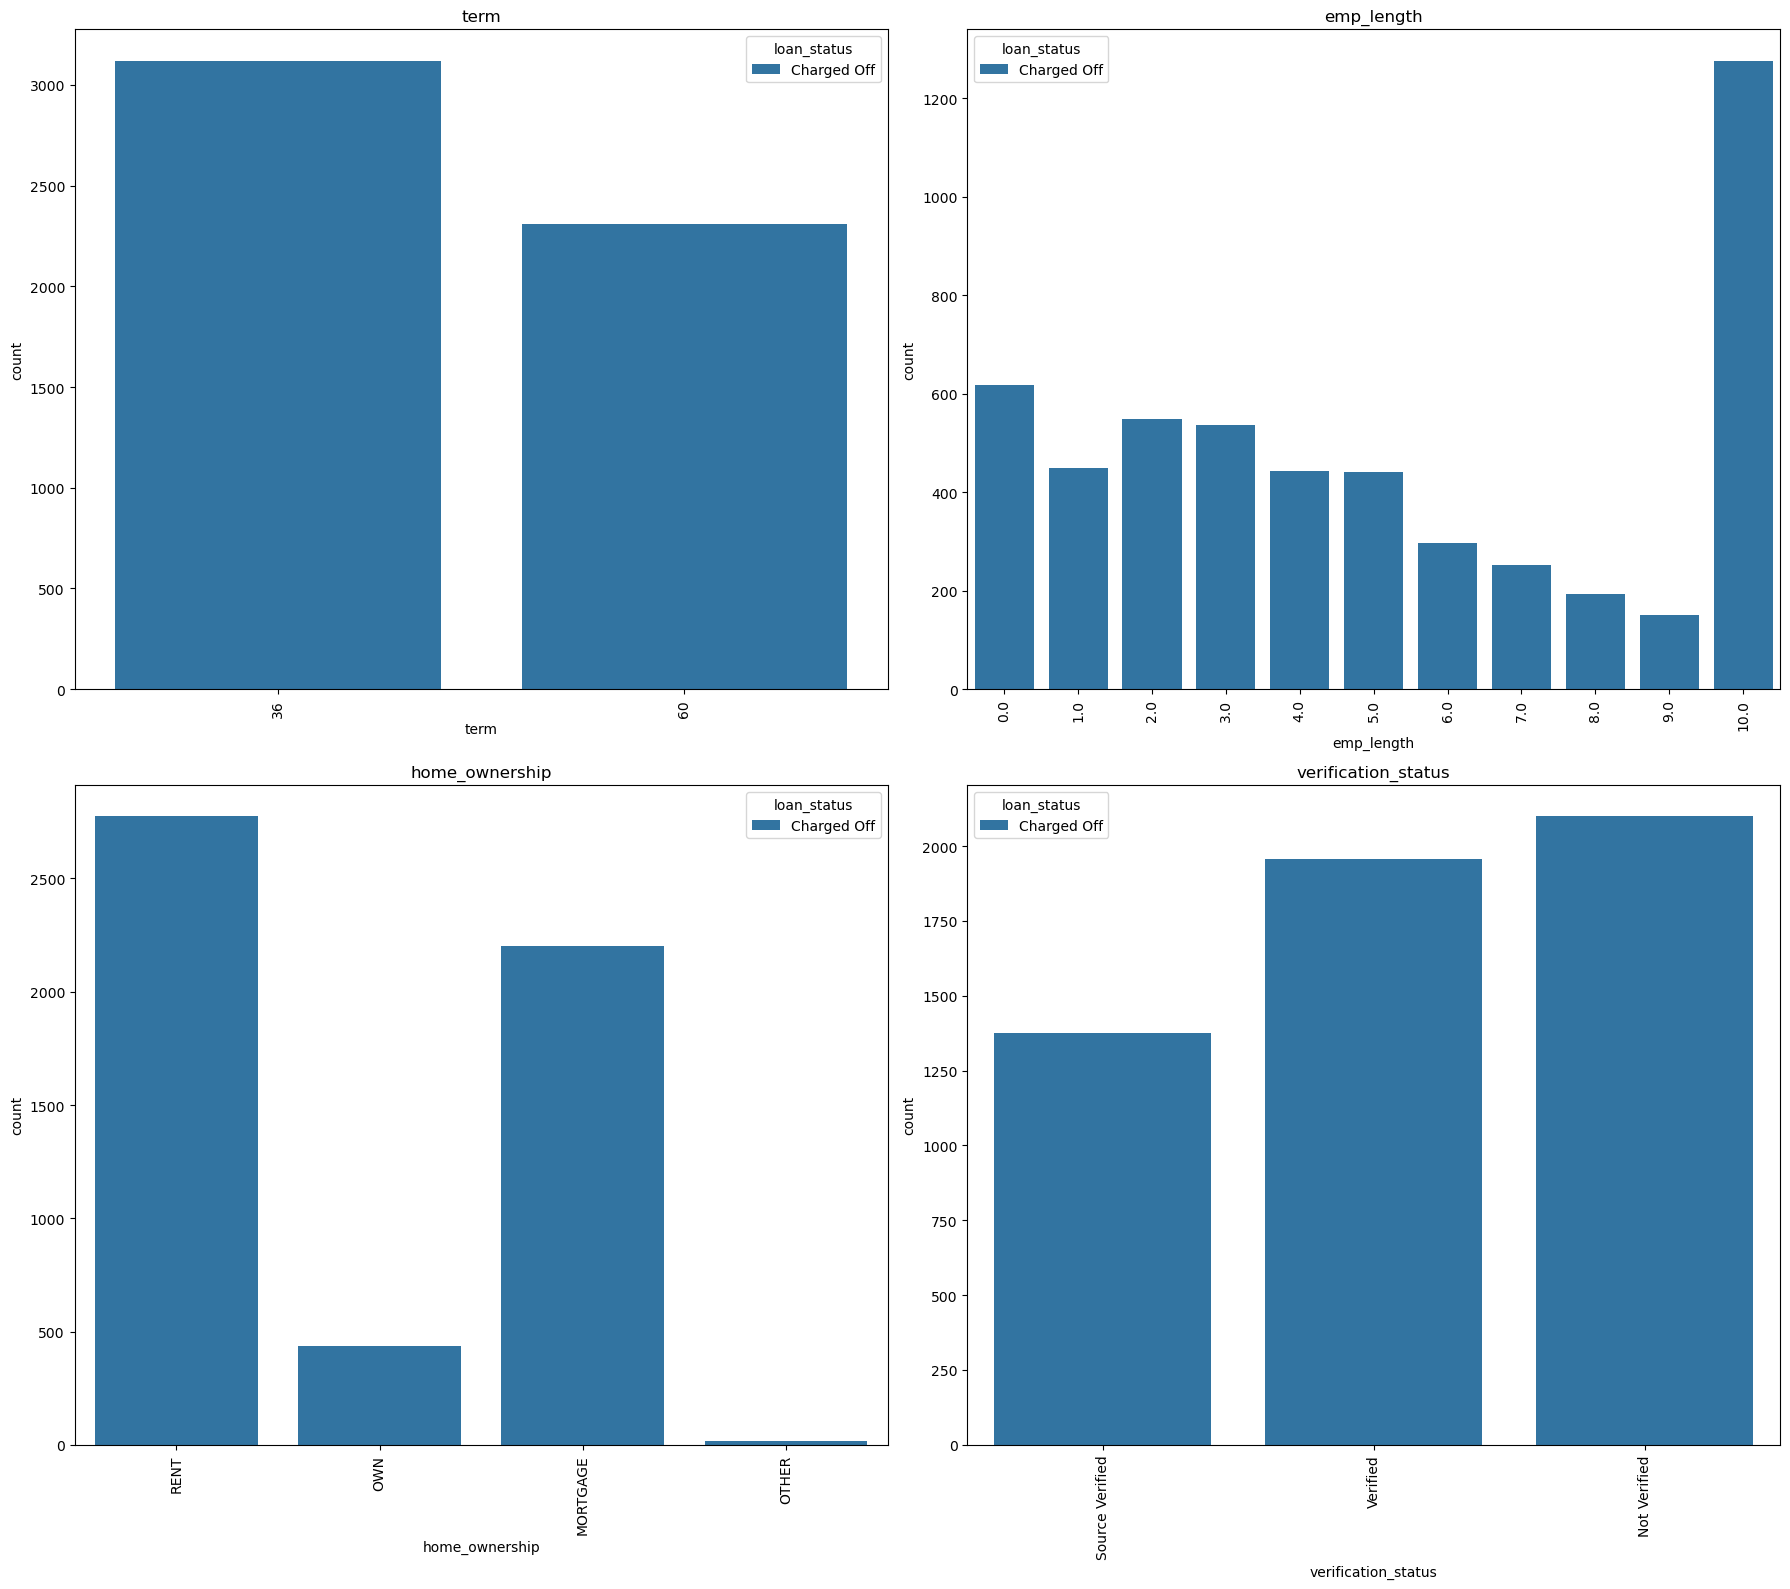

In [410]:
categorical_ordered_1 = ['term','emp_length','home_ownership','verification_status'] 
plot_countplots_grid(loan[loan.loan_status == 'Charged Off'], categorical_ordered_1,2)

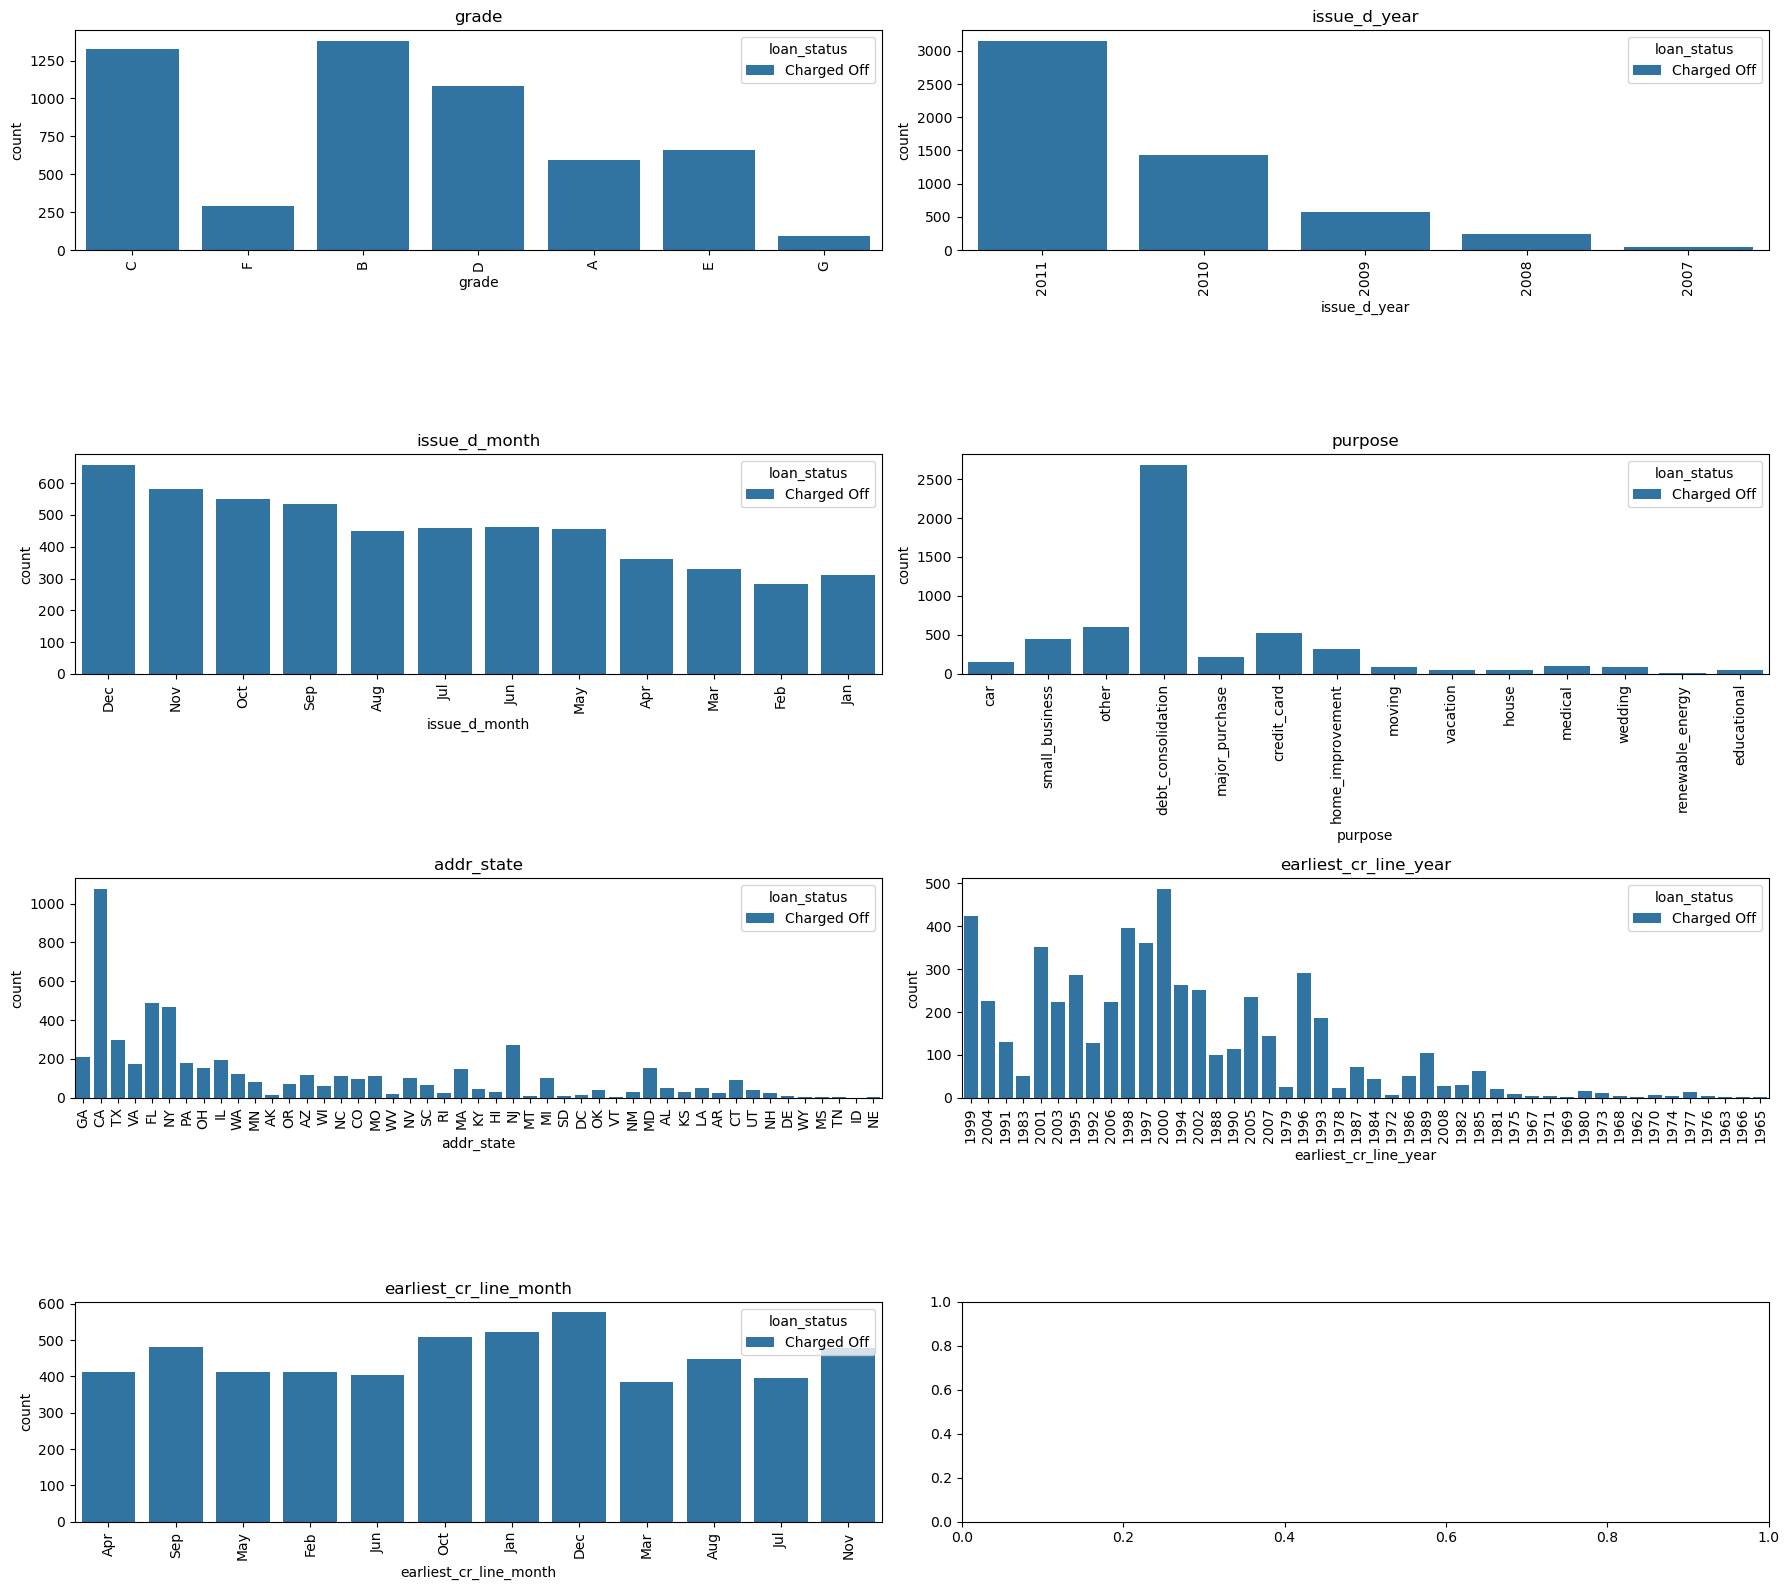

In [411]:
categorical_ordered_2 = ['grade','issue_d_year','issue_d_month','purpose','addr_state','earliest_cr_line_year','earliest_cr_line_month']
plot_countplots_grid(loan[loan.loan_status == 'Charged Off'], categorical_ordered_2,4)

## Observation 2.
### Histogram Univariate Categorical Analysis on Defaulters ('Charged off' Loan status)

The Number of Loan defaulters are higher in following cases:

a. The Loan payment term is 36 months

b. The Employment length is 10 years or more

c. The home ownership status provided by the borrower during registration is 'RENT'

d. The LC assigned loan grade is 'B' or 'C'

e. The issue month which the loan was funded was 'Sep', 'Oct', 'Nov' & 'Dec'

f. The issue year which the loan was funded was 2011

g. The category provided by the borrower for the loan request was 'Debt Consolidation'

h. The state provided by the borrower in the loan application was 'California', 'Florida' & 'New York'

i. The month the borrower's earliest reported credit line was opened was 'Sep', 'Oct', 'Nov' & 'Dec'

j. The year the borrower's earliest reported credit line was opened 1999 or 2000


# Bivariate analysis

### Transforming Categorical & Segmented variables to Numeric

In [412]:
#To analyze all relevant variables, we may have to convert certain categorical variables to numeric variables 
loan['home_ownership_num'] = loan.loc[:, 'home_ownership']
loan['home_ownership_num'], uniques_home_ownership = pd.factorize(loan['home_ownership_num'], use_na_sentinel=False)
print('home_ownership_num mapping is \n', uniques_home_ownership)
print('\n')

loan['grade_num'] = loan.loc[:, 'grade']
loan['grade_num'], uniques_grade_num = pd.factorize(loan['grade_num'], use_na_sentinel=False)
print('grade_num mapping is \n', uniques_grade_num)
print('\n')

loan['purpose_num'] = loan.loc[:, 'purpose']
loan['purpose_num'], uniques_purpose_num = pd.factorize(loan['purpose_num'], use_na_sentinel=False)
print('purpose_num mapping is \n', uniques_purpose_num)
print('\n')

loan['int_rate_grp_num'] = loan.loc[:, 'int_rate_grp']
loan['int_rate_grp_num'], uniques_int_rate_grp_num = pd.factorize(loan['int_rate_grp_num'], use_na_sentinel=False)
print('int_rate_grp_num mapping is \n', uniques_int_rate_grp_num)
print('\n')

loan['annual_inc_grp_num'] = loan.loc[:, 'annual_inc_grp']
loan['annual_inc_grp_num'], uniques_annual_inc_grp_num = pd.factorize(loan['annual_inc_grp_num'], use_na_sentinel=False)
print('annual_inc_grp_num mapping is \n', uniques_annual_inc_grp_num)
print('\n')

loan['installment_grp_num'] = loan.loc[:, 'installment_grp']
loan['installment_grp_num'], uniques_installment_grp_num = pd.factorize(loan['installment_grp_num'], use_na_sentinel=False)
print('installment_grp_num mapping is \n', uniques_installment_grp_num)
print('\n')

loan['loan_amnt_grp_num'] = loan.loc[:, 'loan_amnt_grp']
loan['loan_amnt_grp_num'], uniques_loan_amnt_grp_num = pd.factorize(loan['loan_amnt_grp_num'], use_na_sentinel=False)
print('loan_amnt_grp_num mapping is \n', uniques_loan_amnt_grp_num)
print('\n')

home_ownership_num mapping is 
 Index(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype='object')


grade_num mapping is 
 Index(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype='object')


purpose_num mapping is 
 Index(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase', 'medical',
       'moving', 'vacation', 'house', 'renewable_energy', 'educational'],
      dtype='object')


int_rate_grp_num mapping is 
 CategoricalIndex(['8%-11%', '14%-18%', '11%-14%', '5%-8%', '18%-21%',
                  '21%-24%'],
                 categories=['5%-8%', '8%-11%', '11%-14%', '14%-18%', '18%-21%', '21%-24%'], ordered=True, dtype='category')


annual_inc_grp_num mapping is 
 CategoricalIndex(['3.8k-27.5k', '27.5k-51k', '51k-74.5k', '74.5k-98k',
                  '98k-121.5k', '121.5k-145k'],
                 categories=['3.8k-27.5k', '27.5k-51k', '51k-74.5k', '74.5k-98k', '98k-121.5k', '121.5k-145k'], ordered=True, dtype='categ

In [413]:
loan.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,earliest_cr_line_year,earliest_cr_line_month,issue_d_year,issue_d_month,int_rate_grp,annual_inc_grp,installment_grp,loan_amnt_grp,home_ownership_num,grade_num,purpose_num,int_rate_grp_num,annual_inc_grp_num,installment_grp_num,loan_amnt_grp_num
39711,92402,92390,5000,5000,700.0,36,8.70,158.30,B,B1,5.0,MORTGAGE,75000.0,Not Verified,2007-07-01,Fully Paid,credit_card,CO,15.55,1994-05-01,0,10,0,23.0,29,NaN,1994,May,2007,Jul,8%-11%,74.5k-98k,14-231,466-6.25k,2,0,0,0,3,0,0
39712,92187,92174,2500,2500,1075.0,36,8.07,78.42,A,A4,4.0,MORTGAGE,110000.0,Not Verified,2007-07-01,Fully Paid,home_improvement,CO,11.33,1990-11-01,0,13,0,13.1,40,NaN,1990,Nov,2007,Jul,5%-8%,98k-121.5k,14-231,466-6.25k,2,2,6,3,4,0,0
39713,90665,90607,8500,8500,875.0,36,10.28,275.38,C,C1,3.0,RENT,18000.0,Not Verified,2007-07-01,Fully Paid,credit_card,NC,6.40,1986-12-01,1,6,0,26.9,9,NaN,1986,Dec,2007,Jul,8%-11%,3.8k-27.5k,231-446,6.25k-12k,0,1,0,0,0,1,1
39714,90395,90390,5000,5000,1325.0,36,8.07,156.84,A,A4,0.0,MORTGAGE,100000.0,Not Verified,2007-07-01,Fully Paid,debt_consolidation,MA,2.30,1998-10-01,0,11,0,19.4,20,NaN,1998,Oct,2007,Jul,5%-8%,98k-121.5k,14-231,466-6.25k,2,2,5,3,4,0,0
39716,87023,86999,7500,7500,800.0,36,13.75,255.43,E,E2,0.0,OWN,22000.0,Not Verified,2007-06-01,Fully Paid,debt_consolidation,MA,14.29,2003-10-01,0,7,0,51.5,8,NaN,2003,Oct,2007,Jun,11%-14%,3.8k-27.5k,231-446,6.25k-12k,1,3,5,2,0,1,1


In [414]:
loan_charged_off_df = loan[loan.loan_status == 'Charged Off']
loan_charged_off_df_numeric = loan_charged_off_df[['term','loan_amnt_grp_num','int_rate_grp_num','installment_grp_num',
                        'annual_inc_grp_num','dti','revol_util','emp_length','home_ownership_num','grade_num','purpose_num']]

In [415]:
loan_charged_off_df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5431 entries, 1 to 39688
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   term                 5431 non-null   int64  
 1   loan_amnt_grp_num    5431 non-null   int64  
 2   int_rate_grp_num     5431 non-null   int64  
 3   installment_grp_num  5431 non-null   int64  
 4   annual_inc_grp_num   5431 non-null   int64  
 5   dti                  5431 non-null   float64
 6   revol_util           5415 non-null   float64
 7   emp_length           5206 non-null   float64
 8   home_ownership_num   5431 non-null   int64  
 9   grade_num            5431 non-null   int64  
 10  purpose_num          5431 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 509.2 KB


### Correlation Matrix

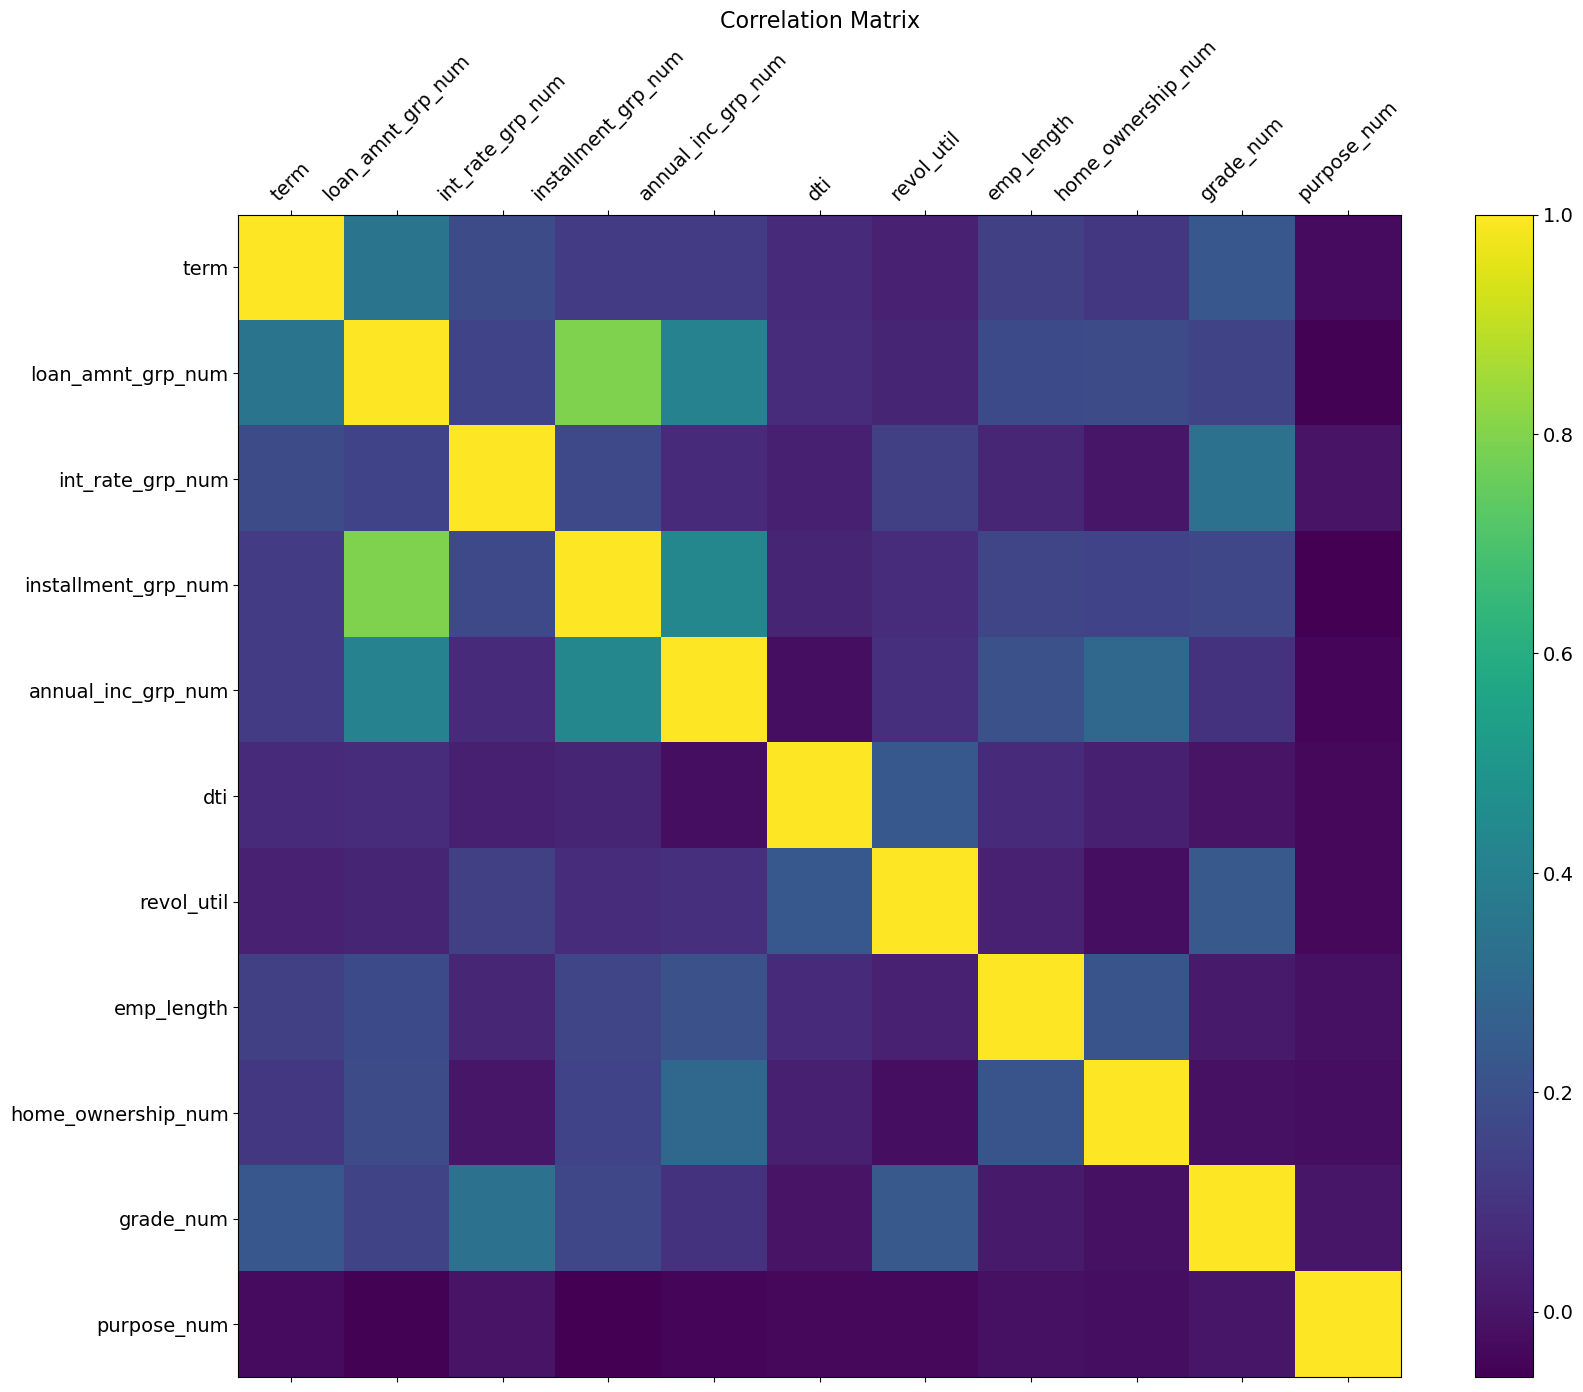

In [416]:
f = plt.figure(figsize=(19, 15))

loan_charged_off_df_numeric_corr = loan_charged_off_df_numeric.corr()

plt.matshow(loan_charged_off_df_numeric_corr, fignum=f.number)

plt.xticks(range(loan_charged_off_df_numeric.select_dtypes(['number']).shape[1]), loan_charged_off_df_numeric.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(loan_charged_off_df_numeric.select_dtypes(['number']).shape[1]), loan_charged_off_df_numeric.select_dtypes(['number']).columns, fontsize=14)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

plt.show()

In [417]:
loan_charged_off_df_numeric_corr

,term,loan_amnt_grp_num,int_rate_grp_num,installment_grp_num,annual_inc_grp_num,dti,revol_util,emp_length,home_ownership_num,grade_num,purpose_num
term,1.000000,0.347198,0.186552,0.124793,0.128882,0.066626,0.036500,0.143043,0.110724,0.229805,-0.029954
loan_amnt_grp_num,0.347198,1.000000,0.151502,0.795072,0.408557,0.076367,0.047918,0.176649,0.188578,0.155542,-0.053430
int_rate_grp_num,0.186552,0.151502,1.000000,0.172796,0.070118,0.033026,0.141189,0.055143,0.006396,0.339180,-0.003073
installment_grp_num,0.124793,0.795072,0.172796,1.000000,0.429147,0.051561,0.072917,0.159689,0.152900,0.167435,-0.059791
annual_inc_grp_num,0.128882,0.408557,0.070118,0.429147,1.000000,-0.022040,0.085953,0.203528,0.296079,0.096819,-0.039445
dti,0.066626,0.076367,0.033026,0.051561,-0.022040,1.000000,0.230735,0.066194,0.032019,-0.003733,-0.038277
revol_util,0.036500,0.047918,0.141189,0.072917,0.085953,0.230735,1.000000,0.038709,-0.022208,0.235008,-0.038910
emp_length,0.143043,0.176649,0.055143,0.159689,0.203528,0.066194,0.038709,1.000000,0.215108,0.018750,-0.011500
home_ownership_num,0.110724,0.188578,0.006396,0.152900,0.296079,0.032019,-0.022208,0.215108,1.000000,-0.012452,-0.022109
grade_num,0.229805,0.155542,0.339180,0.167435,0.096819,-0.003733,0.235008,0.018750,-0.012452,1.000000,0.003743


### There is strong Positive Correlation between:

a. Loan Amount and Installment (monthly payment owed by borrower)

b. Loan Interest Rate and LC assigned Loan Grade

There is some Positive Correlation between:

a. Loan Term (number of payments) and Loan Interest Rate

b. Loan Amount and Borrower's Annual Income

c. Loan Amount and Loan Interest Rate

d. Installment and Borrower's Annual Income

e. DTI (Debt-to-Income ratio) and Loan Amount

f. Employee Length and Loan Amount

g. Employee Length and Home ownership category


### Loan Amount & Installment relationship

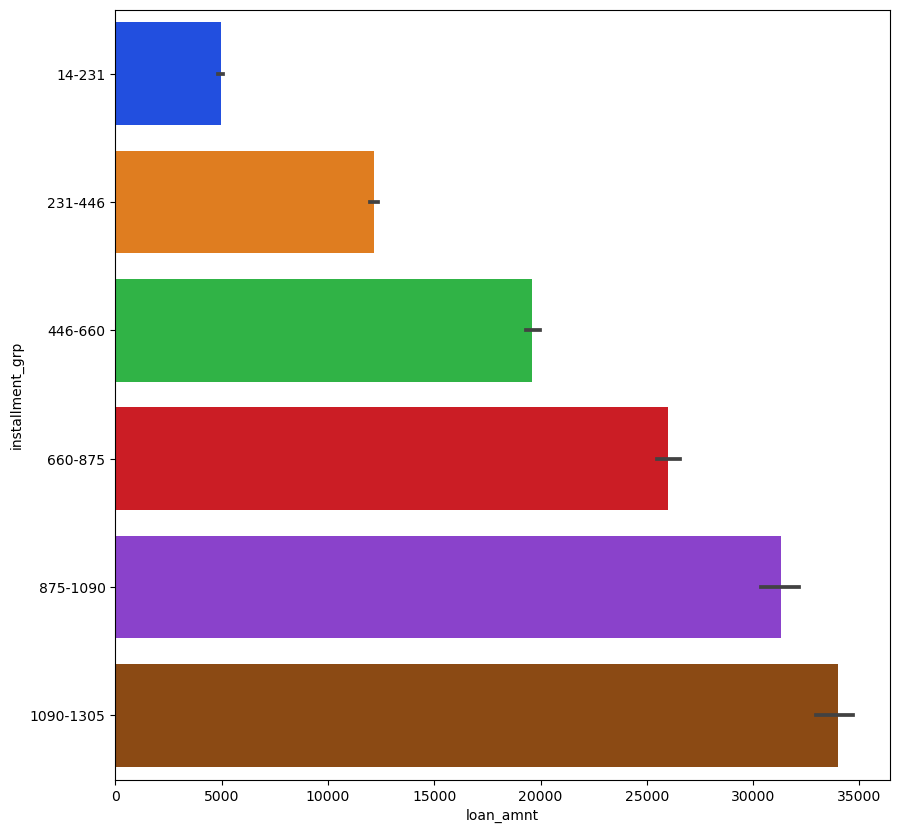

In [418]:
from matplotlib import ticker

plt.figure(figsize=(10,10))
ax = sns.barplot(data=loan_charged_off_df,x='loan_amnt', y='installment_grp',palette="bright")

plt.show()

### Loan Amount and Borrower's Annual Income

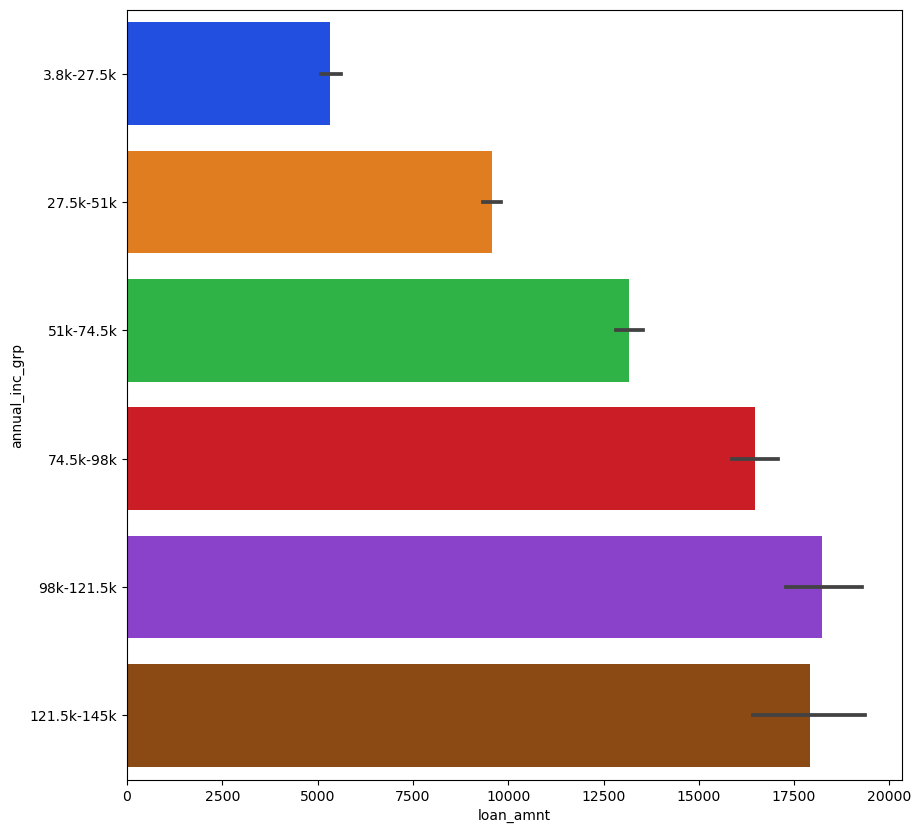

In [419]:

plt.figure(figsize=(10,10))
ax = sns.barplot(data=loan_charged_off_df,x='loan_amnt', y='annual_inc_grp',palette="bright")

plt.show()

### Loan Amount and Loan Interest Rate

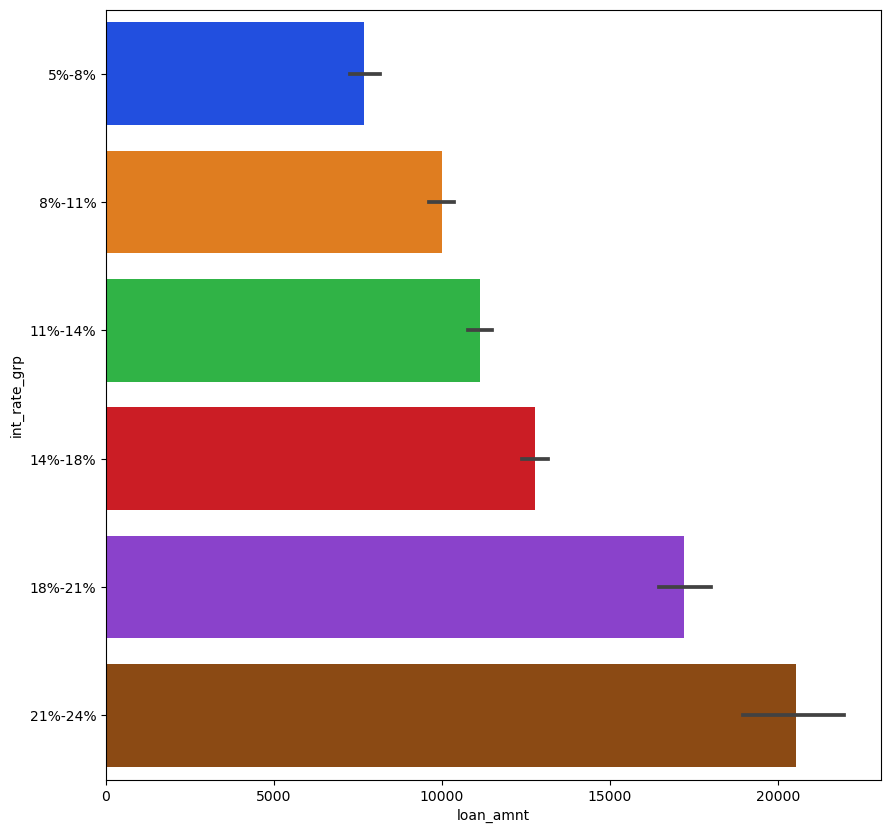

In [420]:
plt.figure(figsize=(10,10))
ax = sns.barplot(data=loan_charged_off_df,x='loan_amnt', y='int_rate_grp',palette="bright")

plt.show()

### Employee Length and Loan Amount

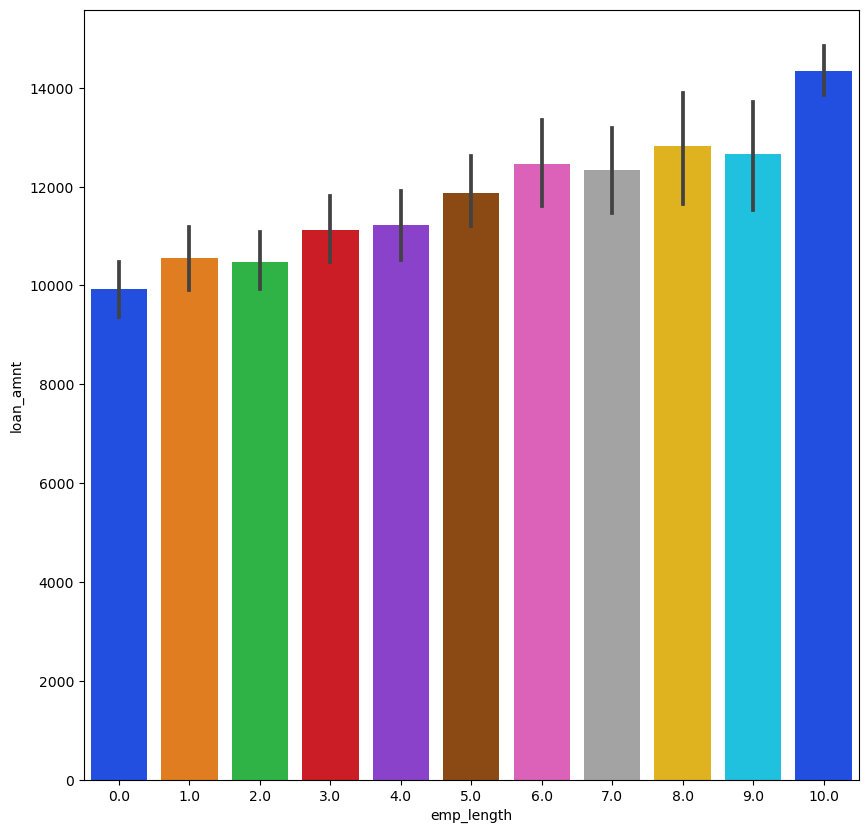

In [421]:
plt.figure(figsize=(10,10))
ax = sns.barplot(data=loan_charged_off_df,x='emp_length', y='loan_amnt',palette="bright")

plt.show()

### Loan Amount  and LC assigned Loan Grade

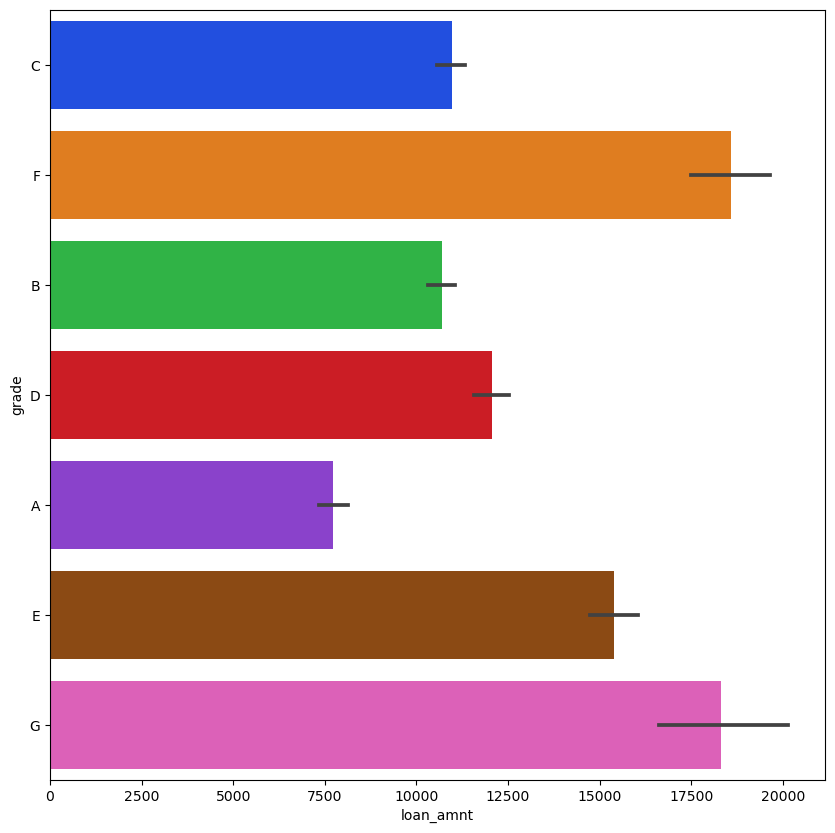

In [422]:
plt.figure(figsize=(10,10))
ax = sns.barplot(data=loan_charged_off_df,x='loan_amnt', y='grade',palette="bright") 

plt.show()

### DTI (Debt-to-Income ratio) and Loan Amount

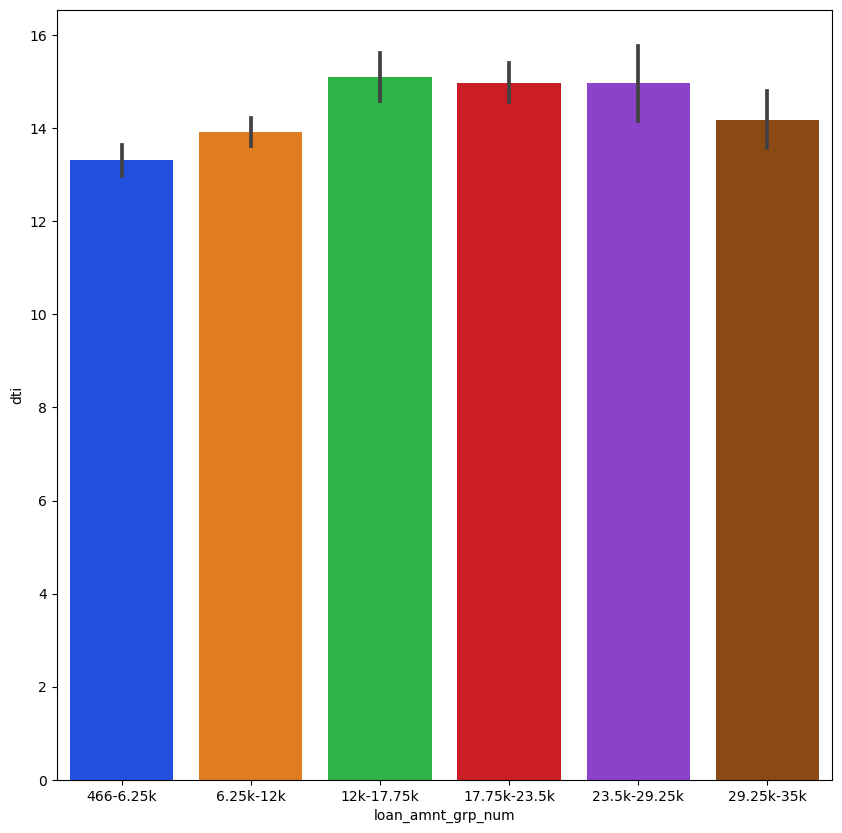

In [423]:
plt.figure(figsize=(10,10))
ax = sns.barplot(data=loan_charged_off_df,x='loan_amnt_grp_num', y='dti',palette="bright")

ax.xaxis.set_major_locator(ticker.FixedLocator(uniques_loan_amnt_grp_num.codes))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(uniques_loan_amnt_grp_num))

plt.show()

### Loan Interest Rate and LC assigned Loan Grade

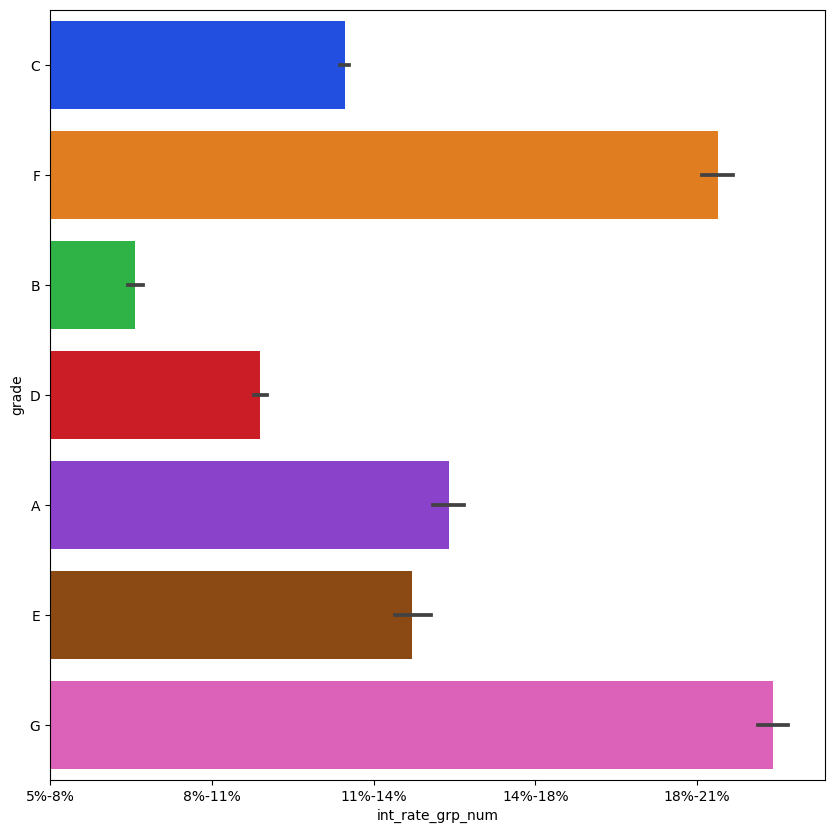

In [424]:

plt.figure(figsize=(10,10))
ax = sns.barplot(data=loan_charged_off_df,x='int_rate_grp_num', y='grade',palette="bright")

ax.xaxis.set_major_locator(ticker.FixedLocator(uniques_int_rate_grp_num.codes))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(uniques_int_rate_grp_num)) 

plt.show()

### Loan Interest Rate and Borrower's Annual Income

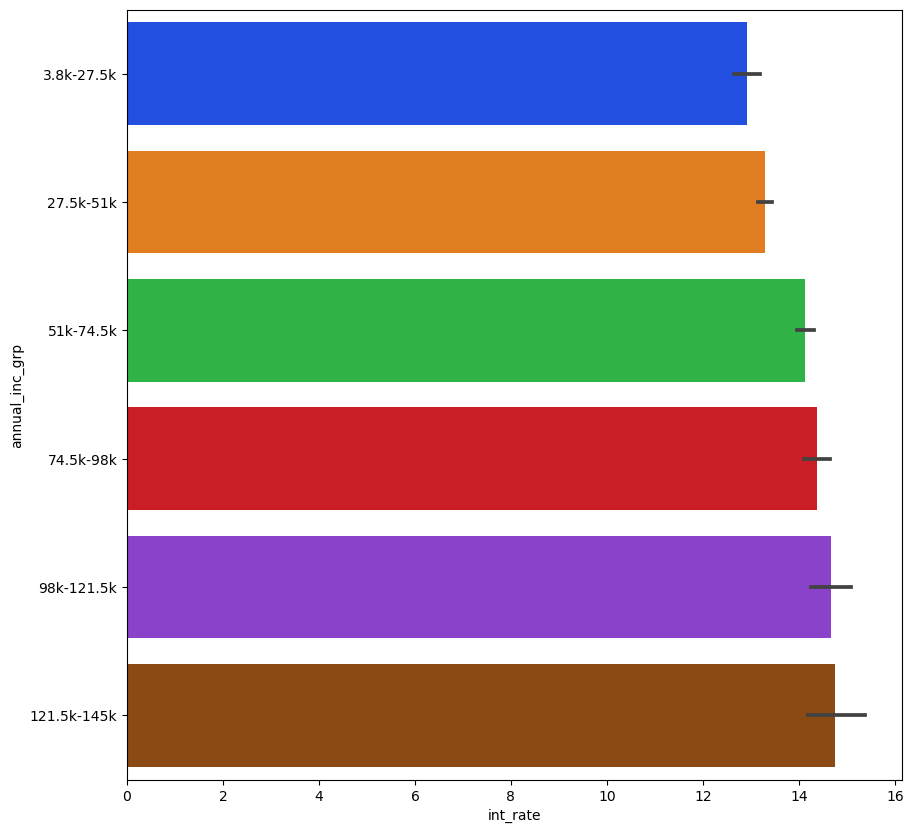

In [425]:
plt.figure(figsize=(10,10))
ax = sns.barplot(data=loan_charged_off_df,x='int_rate', y='annual_inc_grp',palette="bright") 

plt.show()

### Home ownership and Employee Length category

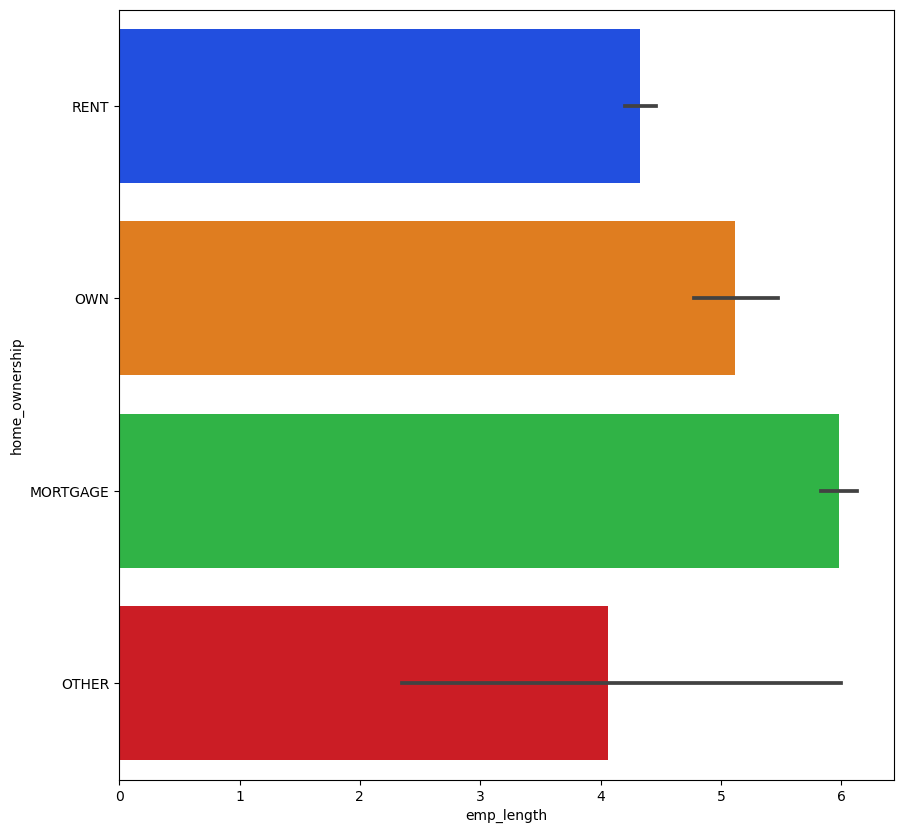

In [426]:
plt.figure(figsize=(10,10))
ax = sns.barplot(data=loan_charged_off_df,x='emp_length', y='home_ownership',palette="bright")

plt.show()

### Home ownership and Income

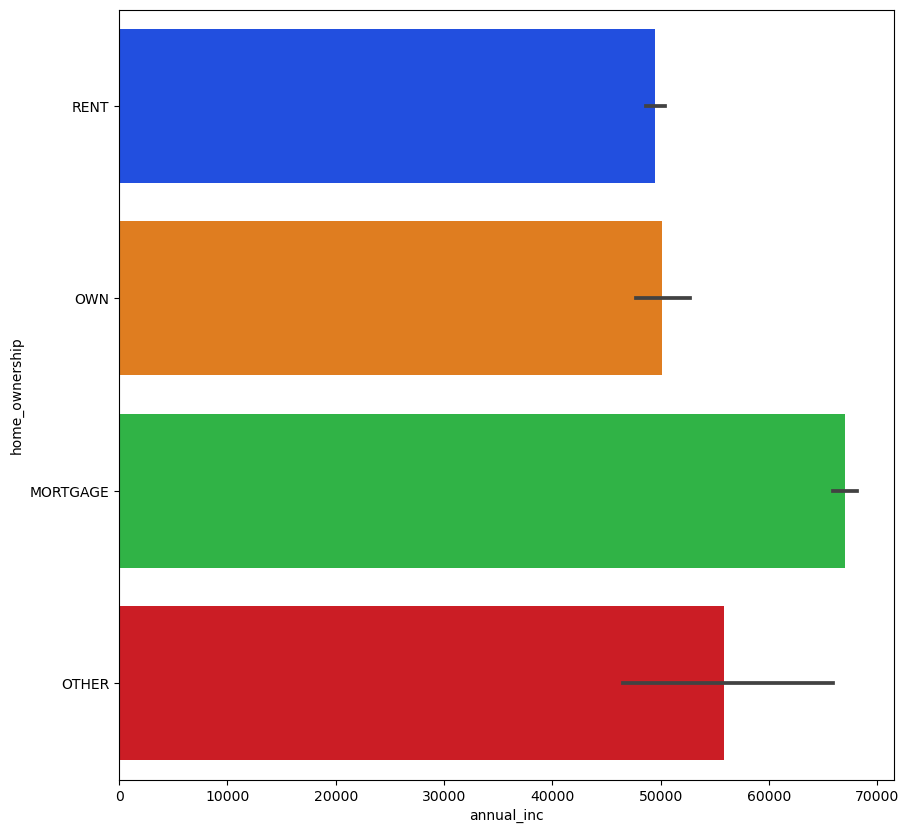

In [427]:
plt.figure(figsize=(10,10))
ax = sns.barplot(data=loan_charged_off_df,x='annual_inc', y='home_ownership',palette="bright") 

plt.show()

### Home ownership and Loan Amount

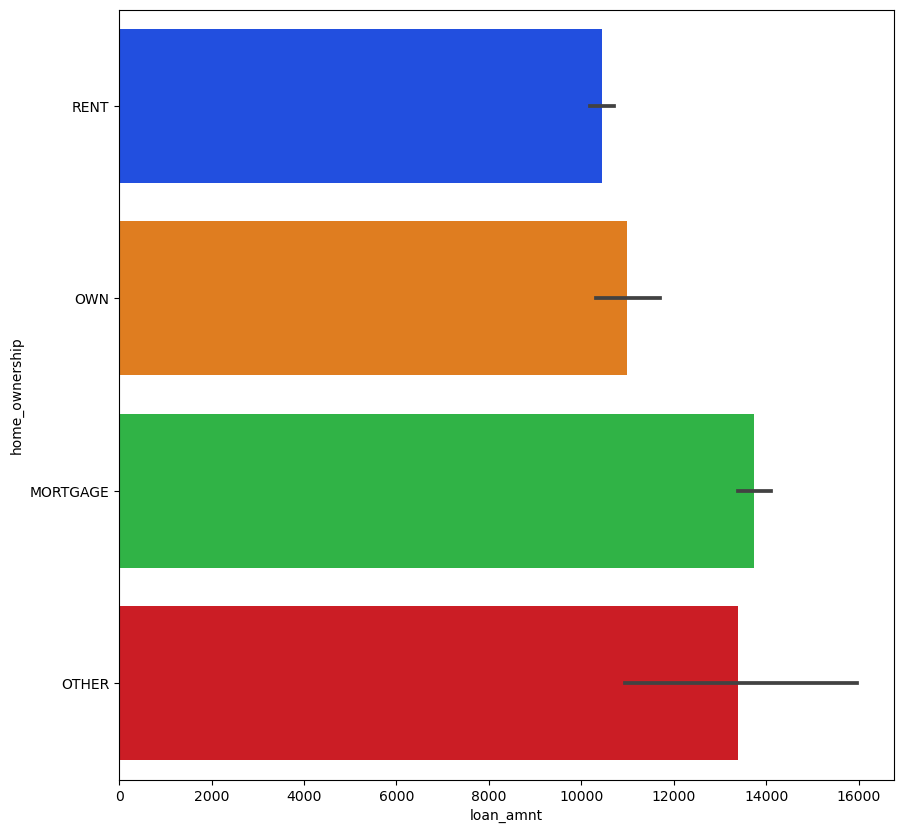

In [428]:
plt.figure(figsize=(10,10))
ax = sns.barplot(data=loan_charged_off_df,x='loan_amnt', y='home_ownership',palette="bright")

plt.show()

## Observation 3.
### Bivariate Analysis on Defaulters ('Charged off' Loan status)

When analyzing the Bivariate pattens, the chances of Loan default or charged off occurs in following combinations:

a. Loan amount is high (around 35000) and Monthly installment is high (1000 ~ 1300)

b. Loan amount is high (around 20000) and Interest Rate is high (21%-24%)

c. Loan amount is high (around 14000) and Employee Tenure is high (10+ years)

d. Loan amount is between 12k to 30k and DTI is > 14

e. Loan amount > 17000 & Loan grade is F or G

f. Loan amount > 13000 & Home ownership category is 'MORTGAGE'

g. Loan grade is F or G and Interest Rate is high (> 18%)

h. Employee Tenure is high (> 6 years) and Home ownership category is 'MORTGAGE'

i. Income is high (> 65k) and Home ownership category is 'MORTGAGE' 